In [2]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

In [2]:

mean = 0
variance = 10
x = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
print(x)

tensor(6.5730)


In [43]:
x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(logits = torch.tensor([0.01,0.99])))
print(x)

tensor(0)


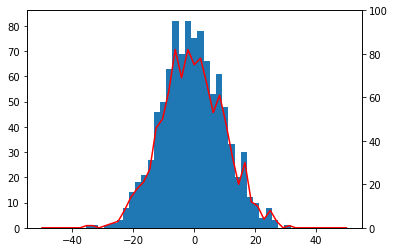

In [6]:
def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()
    ax.set_xlim(( -50, 50))
    ax.set_ylim((0,100))
    
    ax2 = ax.twinx()
    ax2.set_ylim((0, 100))
    
    line, = ax2.plot([], [])
    line.set_color('r')
    
    def sin(i):
        i = i*10
        mean = 0
        variance = 10
        list = []
        ax.cla()
        if i >= 1:
            for w in range(i):
                x = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
                list.append(x)     
            n, bins, patches  = ax.hist(list, density=False, bins=np.linspace(-50, 50,50))
            x1 = np.linspace(-50, 50, len(n))
            line.set_data(x1, n)    
        return (line,)

    # initialization function: plot the background of each frame
    def init():
        
        line.set_data([], [])
        return (line,)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, sin, init_func=init,
                                   frames=100, interval=100, blit=True)
    return HTML(anim.to_jshtml())

animate()

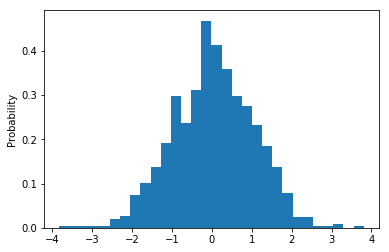

In [5]:
x = np.random.normal(size = 1000)
plt.hist(x, density=True, bins=30)
plt.ylabel('Probability');

0.0010393569353345914
1.785170866226357e-05
1.4808098908367009e-05
0.0019841591699305506
-0.0007594417077175699
-0.003871041241904972
0.00350389504931018
-0.0031685825312647038
-0.0021534995670998295
-0.003561396184378852
-0.00010577727308205484
0.006096137098955082
-0.002818533466088567
-0.002574403873899008
-0.00479451151105742
-0.002840314781712455
-0.001993868678310199
-0.002254792063031155
0.004190493345572137
-0.0030632719114214862
-0.006001245391136148
-0.0009997228254735
-0.0045390972718839726
0.0028423248851675055
-0.003392509102339486
-0.00408578532298319
0.002523620660612836
0.004485049012970175
0.0016230688354321489
0.006386558009848952
0.010397295896135274
-0.007063705542911004
-0.006776287218388199
-0.003410285329082278
-0.0021089222087746218
0.0038088242165664477
0.011129531048622993
-0.0027897995669110276
-0.0041286947462325155
0.0002352556427068081
0.003004562599473022
0.0061260897694589145
0.007060767285905795
0.002646481079765152
0.002016871247407327
0.01393944655236

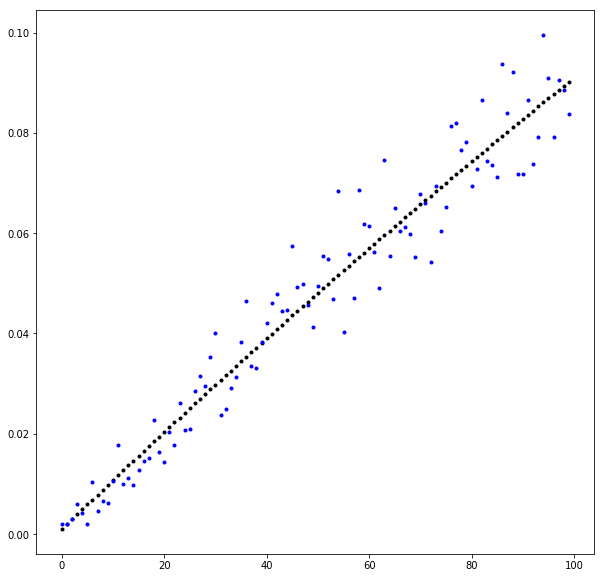

In [37]:
list_of_bayes = []
list_of_exp = []
test_positive_without_disease = 0.02
test_negative_with_disease = 0.01

def bayes(ill):
    size = 50000
    p_ill = ill/size
    p_not_ill = 1 - p_ill
    p_positive_not_ill = test_positive_without_disease
    p_negative_ill = test_negative_with_disease
    p_positive_ill = 1 - p_negative_ill

    p_ill_positive = (p_ill * p_positive_ill)/((p_positive_ill * p_ill) + (p_positive_not_ill * p_not_ill))
    return p_ill_positive

def test(probability, size):
     with pyro.plate("population", size):
        return torch.sum(pyro.sample("categorical_sampling", pyro.distributions.Categorical(torch.tensor([1 - probability,probability]))))

def experimental_result(ill):
    
    size = 50000
    probability = ill/size
    pos_ill = 1 - test_negative_with_disease
    pos_not_ill = test_positive_without_disease
    illness = test(probability, size)
    
    if illness == 0:
        illness = 1
    test1 = test(pos_ill, illness)
    test2 = test(pos_not_ill, size - illness)
    
    return test1.item() / (test1.item() + test2.item() )
    
    
for x in range(1,101):
    q1= experimental_result(x)
    q2 = bayes(x)
    print(q1-q2)
    list_of_bayes.append(q2)
    list_of_exp.append(q1)

fig, ax = plt.subplots(figsize=(10, 10))
bayes_plot = ax.plot( list_of_bayes, 'k.')
exp_plot = ax.plot( list_of_exp, 'b.')

plt.show()